## Packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv("../data/raw_data_kangaroo.csv")
df.head()


,Unnamed: 0,id,url,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,accessibleDisabledPeople,epcScore,price
0,0,20661494.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,7.0,NaN,NaN,C,399000.0
1,1,20647642.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,...,True,3.0,NaN,NaN,True,1.0,NaN,NaN,E,895000.0
2,2,20644816.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,2.0,NaN,NaN,F,465000.0
3,3,20659813.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,...,NaN,2.0,NaN,NaN,True,3.0,NaN,NaN,B,590000.0
4,4,20633249.0,https://www.immoweb.be/en/classified/flat-stud...,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,E,289000.0


## Exploring the dataset 

In [2]:
# Dataset dimensions
df.shape

(80368, 53)

In [3]:
# Display columns 
df.columns 

Index(['Unnamed: 0', 'id', 'url', 'type', 'subtype', 'bedroomCount',
       'bathroomCount', 'province', 'locality', 'postCode', 'habitableSurface',
       'roomCount', 'monthlyCost', 'hasAttic', 'hasBasement',
       'hasDressingRoom', 'diningRoomSurface', 'hasDiningRoom',
       'buildingCondition', 'buildingConstructionYear', 'facedeCount',
       'floorCount', 'streetFacadeWidth', 'hasLift', 'floodZoneType',
       'heatingType', 'hasHeatPump', 'hasPhotovoltaicPanels',
       'hasThermicPanels', 'kitchenSurface', 'kitchenType', 'landSurface',
       'hasLivingRoom', 'livingRoomSurface', 'hasBalcony', 'hasGarden',
       'gardenSurface', 'gardenOrientation', 'parkingCountIndoor',
       'parkingCountOutdoor', 'hasAirConditioning', 'hasArmoredDoor',
       'hasVisiophone', 'hasOffice', 'toiletCount', 'hasSwimmingPool',
       'hasFireplace', 'hasTerrace', 'terraceSurface', 'terraceOrientation',
       'accessibleDisabledPeople', 'epcScore', 'price'],
      dtype='object')

In [4]:
# Data type
df.dtypes

Unnamed: 0                    int64
id                          float64
url                          object
type                         object
subtype                      object
bedroomCount                float64
bathroomCount               float64
province                     object
locality                     object
postCode                      int64
habitableSurface            float64
roomCount                   float64
monthlyCost                 float64
hasAttic                     object
hasBasement                  object
hasDressingRoom              object
diningRoomSurface           float64
hasDiningRoom                object
buildingCondition            object
buildingConstructionYear    float64
facedeCount                 float64
floorCount                  float64
streetFacadeWidth           float64
hasLift                      object
floodZoneType                object
heatingType                  object
hasHeatPump                  object
hasPhotovoltaicPanels       

In [5]:
# Overview missing values 
df.isnull().sum()

Unnamed: 0                      0
id                              0
url                             0
type                            0
subtype                         0
bedroomCount                 6810
bathroomCount               13696
province                        0
locality                        0
postCode                        0
habitableSurface            12585
roomCount                   58420
monthlyCost                 80368
hasAttic                    67852
hasBasement                 51053
hasDressingRoom             77740
diningRoomSurface           73467
hasDiningRoom               66227
buildingCondition           22376
buildingConstructionYear    31262
facedeCount                 27129
floorCount                  42822
streetFacadeWidth           64858
hasLift                     61324
floodZoneType               35902
heatingType                 33215
hasHeatPump                 72895
hasPhotovoltaicPanels       72320
hasThermicPanels            77256
kitchenSurface

In [6]:
# Descriptive stats 
df.describe()

,Unnamed: 0,id,bedroomCount,bathroomCount,postCode,habitableSurface,roomCount,monthlyCost,diningRoomSurface,buildingConstructionYear,...,landSurface,livingRoomSurface,hasBalcony,gardenSurface,parkingCountIndoor,parkingCountOutdoor,toiletCount,terraceSurface,accessibleDisabledPeople,price
count,80368.000000,8.036800e+04,73558.000000,66672.000000,80368.000000,67783.000000,21948.000000,0.0,6901.000000,49106.000000,...,39541.000000,28950.000000,0.0,15958.000000,28239.000000,18326.000000,55094.00000,28599.000000,0.0,7.637000e+04
mean,209681.710133,1.952922e+07,3.008877,1.427121,5266.587199,178.499993,7.110443,NaN,21.124620,1978.017350,...,1289.410637,37.134715,NaN,696.321156,6.677751,8.280803,1.80624,24.512710,NaN,4.476061e+05
std,105460.844153,2.897688e+06,1.833185,4.556189,3045.698904,820.878936,5.824088,NaN,43.536167,41.595504,...,5657.080544,209.681277,NaN,6308.715326,430.014870,746.151955,8.41452,43.244643,NaN,5.115757e+05
min,0.000000,1.882546e+06,1.000000,1.000000,1000.000000,6.000000,1.000000,NaN,1.000000,1753.000000,...,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.00000,1.000000,NaN,3.141000e+03
25%,181965.750000,2.035055e+07,2.000000,1.000000,2330.000000,93.000000,1.000000,NaN,14.000000,1957.000000,...,218.000000,25.000000,NaN,55.000000,1.000000,1.000000,1.00000,8.000000,NaN,2.300000e+05
50%,235124.500000,2.052985e+07,3.000000,1.000000,4830.000000,140.000000,6.000000,NaN,18.000000,1980.000000,...,461.000000,32.000000,NaN,171.000000,1.000000,2.000000,2.00000,15.000000,NaN,3.299000e+05
75%,257006.250000,2.061494e+07,4.000000,2.000000,8420.000000,200.000000,11.000000,NaN,24.000000,2017.000000,...,963.000000,40.000000,NaN,518.000000,1.000000,3.000000,2.00000,29.000000,NaN,4.790000e+05
max,446550.000000,2.066439e+07,100.000000,1146.000000,9992.000000,185347.000000,68.000000,NaN,2470.000000,2055.000000,...,580608.000000,34418.000000,NaN,734674.000000,50000.000000,101010.000000,1958.00000,2921.000000,NaN,1.500000e+07


## Datacleaning 

#### Duplicates

In [7]:
# Delete duplicates 

df = df.drop_duplicates(subset="id")

In [8]:
df.shape

(80367, 53)

#### Missing values

In [9]:
# Display missing values

def missing_values_report (dataframe):
    """Display the percentage of missing values in the DataFrame"""
    missing_percent = (dataframe.isna().sum() / len(dataframe)) * 100
    print(missing_percent.sort_values())

missing_values_report(df)

Unnamed: 0                    0.000000
id                            0.000000
url                           0.000000
type                          0.000000
subtype                       0.000000
postCode                      0.000000
locality                      0.000000
province                      0.000000
price                         4.974679
bedroomCount                  8.473627
habitableSurface             15.659412
bathroomCount                17.041821
epcScore                     18.635758
buildingCondition            27.842274
toiletCount                  31.448231
facedeCount                  33.756393
buildingConstructionYear     38.899051
hasTerrace                   40.985728
heatingType                  41.327908
floodZoneType                44.672565
hasLivingRoom                46.650989
kitchenType                  47.844264
landSurface                  50.800702
floorCount                   53.283064
hasBasement                  63.523586
livingRoomSurface        

In [10]:
# Delete unuseful / not significative data columns

df = df.drop(columns=["Unnamed: 0",
                      "id",
                      "url",
                      "monthlyCost",
                      "accessibleDisabledPeople",
                      "hasBalcony",
                      "hasDressingRoom",
                      "streetFacadeWidth",
                      "hasVisiophone",
                      "hasOffice",
                      "kitchenSurface",
                      "diningRoomSurface",
                      "facedeCount",
                      "diningRoomSurface",
                      "livingRoomSurface",
                      "locality"])

# >> a lot of missing values in roomCount, I keep hasLivingRoom etc. 

In [11]:
# Display columns 
df.columns 

Index(['type', 'subtype', 'bedroomCount', 'bathroomCount', 'province',
       'postCode', 'habitableSurface', 'roomCount', 'hasAttic', 'hasBasement',
       'hasDiningRoom', 'buildingCondition', 'buildingConstructionYear',
       'floorCount', 'hasLift', 'floodZoneType', 'heatingType', 'hasHeatPump',
       'hasPhotovoltaicPanels', 'hasThermicPanels', 'kitchenType',
       'landSurface', 'hasLivingRoom', 'hasGarden', 'gardenSurface',
       'gardenOrientation', 'parkingCountIndoor', 'parkingCountOutdoor',
       'hasAirConditioning', 'hasArmoredDoor', 'toiletCount',
       'hasSwimmingPool', 'hasFireplace', 'hasTerrace', 'terraceSurface',
       'terraceOrientation', 'epcScore', 'price'],
      dtype='object')

In [12]:
# Display missing values
missing_values_report (df)

type                         0.000000
subtype                      0.000000
postCode                     0.000000
province                     0.000000
price                        4.974679
bedroomCount                 8.473627
habitableSurface            15.659412
bathroomCount               17.041821
epcScore                    18.635758
buildingCondition           27.842274
toiletCount                 31.448231
buildingConstructionYear    38.899051
hasTerrace                  40.985728
heatingType                 41.327908
floodZoneType               44.672565
hasLivingRoom               46.650989
kitchenType                 47.844264
landSurface                 50.800702
floorCount                  53.283064
hasBasement                 63.523586
terraceSurface              64.414498
parkingCountIndoor          64.862444
roomCount                   72.691528
hasLift                     76.303707
parkingCountOutdoor         77.198353
hasGarden                   80.144836
gardenSurfac

##### Fill missing values

In [13]:
# Boolean columns (consider that a missing value = False)

bool_columns = [
    "hasTerrace",
    "hasLivingRoom",
    "hasBasement",
    "hasLift",
    "hasGarden",
    "hasDiningRoom",
    "hasAttic",
    "hasPhotovoltaicPanels",
    "hasHeatPump",
    "hasArmoredDoor",
    "hasThermicPanels",
    "hasFireplace",
    "hasSwimmingPool",
    "hasAirConditioning"
    ]

for columns in bool_columns :
    df[columns]=df[columns].fillna(False).astype(int)

    

/var/folders/w2/c2k89knd73bgqn5ls5q1bkyw0000gn/T/ipykernel_19955/1044990511.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns]=df[columns].fillna(False).astype(int)
/var/folders/w2/c2k89knd73bgqn5ls5q1bkyw0000gn/T/ipykernel_19955/1044990511.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns]=df[columns].fillna(False).astype(int)
/var/folders/w2/c2k89knd73bgqn5ls5q1bkyw0000gn/T/ipykernel_19955/1044990511.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future ver

In [14]:
# Check if the booleens were replaced by 0 and 1 in the modified columns
df['hasBasement'].value_counts()


hasBasement
0    51052
1    29315
Name: count, dtype: int64

In [15]:

# Data type (check if all the last modified columns are filled by integers)
df.dtypes

type                         object
subtype                      object
bedroomCount                float64
bathroomCount               float64
province                     object
postCode                      int64
habitableSurface            float64
roomCount                   float64
hasAttic                      int64
hasBasement                   int64
hasDiningRoom                 int64
buildingCondition            object
buildingConstructionYear    float64
floorCount                  float64
hasLift                       int64
floodZoneType                object
heatingType                  object
hasHeatPump                   int64
hasPhotovoltaicPanels         int64
hasThermicPanels              int64
kitchenType                  object
landSurface                 float64
hasLivingRoom                 int64
hasGarden                     int64
gardenSurface               float64
gardenOrientation            object
parkingCountIndoor          float64
parkingCountOutdoor         

In [16]:
print ("DataFrame dtypes remaining:")
print (df.dtypes.value_counts())

DataFrame dtypes remaining:
int64      15
float64    13
object     10
Name: count, dtype: int64


In [17]:
missing_values_report(df)

type                         0.000000
hasTerrace                   0.000000
hasFireplace                 0.000000
hasSwimmingPool              0.000000
hasArmoredDoor               0.000000
hasAirConditioning           0.000000
hasGarden                    0.000000
hasLivingRoom                0.000000
hasThermicPanels             0.000000
hasHeatPump                  0.000000
hasLift                      0.000000
hasPhotovoltaicPanels        0.000000
subtype                      0.000000
hasDiningRoom                0.000000
hasBasement                  0.000000
hasAttic                     0.000000
province                     0.000000
postCode                     0.000000
price                        4.974679
bedroomCount                 8.473627
habitableSurface            15.659412
bathroomCount               17.041821
epcScore                    18.635758
buildingCondition           27.842274
toiletCount                 31.448231
buildingConstructionYear    38.899051
heatingType 

### Treat the objects columns 

In [18]:
# List columns with objects
objects_columns = df.select_dtypes('object').columns
missing_objects_percent = (df)
print(f"{len(objects_columns)} objects columns left")
print(objects_columns.tolist())


10 objects columns left
['type', 'subtype', 'province', 'buildingCondition', 'floodZoneType', 'heatingType', 'kitchenType', 'gardenOrientation', 'terraceOrientation', 'epcScore']


In [19]:
missing_values_report(df[objects_columns])

type                   0.000000
subtype                0.000000
province               0.000000
epcScore              18.635758
buildingCondition     27.842274
heatingType           41.327908
floodZoneType         44.672565
kitchenType           47.844264
terraceOrientation    85.986786
gardenOrientation     93.031966
dtype: float64


In [20]:
# Fill N/A objects columns with unknown 

columns_to_fill_unknown = [
    "epcScore",
    "buildingCondition",
    "heatingType",
    "floodZoneType",
    "kitchenType",
    "terraceOrientation", 
    "gardenOrientation"
    ]

for col in columns_to_fill_unknown:
    df[col]=df[col].fillna("unknown")


In [21]:
# dummies to create new columns for the subtype etc. = True/False

df = pd.get_dummies(df, columns=['type',
                                 'subtype',
                                 'province',
                                 'buildingCondition',
                                 'heatingType',
                                 'kitchenType',
                                 'floodZoneType',
                                 'epcScore',
                                 'gardenOrientation',
                                 'terraceOrientation'
                                 ], drop_first=True)

# Change bool in integer 
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

df.head()

,bedroomCount,bathroomCount,postCode,habitableSurface,roomCount,hasAttic,hasBasement,hasDiningRoom,buildingConstructionYear,floorCount,...,gardenOrientation_WEST,gardenOrientation_unknown,terraceOrientation_NORTH,terraceOrientation_NORTH_EAST,terraceOrientation_NORTH_WEST,terraceOrientation_SOUTH,terraceOrientation_SOUTH_EAST,terraceOrientation_SOUTH_WEST,terraceOrientation_WEST,terraceOrientation_unknown
0,2.0,1.0,1040,100.0,NaN,0,1,0,2004.0,7.0,...,0,1,0,0,0,0,0,0,0,1
1,4.0,2.0,1040,270.0,12.0,1,1,1,1910.0,3.0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,1.0,1040,87.0,NaN,0,0,0,1970.0,7.0,...,0,1,0,0,0,0,0,0,0,1
3,2.0,2.0,1040,104.0,NaN,0,0,0,2018.0,21.0,...,0,1,0,0,0,0,0,0,0,1
4,1.0,1.0,1040,71.0,NaN,0,0,0,1906.0,3.0,...,0,1,0,0,0,0,0,0,0,1


In [22]:
print (df.dtypes.value_counts()) 

int64      119
float64     13
Name: count, dtype: int64


### Remaining missing values (numbers)

In [23]:
# call all the columns with at least one NaN
columns_with_na = df.columns[df.isna().any()]

missing_values_report(df[columns_with_na]) 

price                        4.974679
bedroomCount                 8.473627
habitableSurface            15.659412
bathroomCount               17.041821
toiletCount                 31.448231
buildingConstructionYear    38.899051
landSurface                 50.800702
floorCount                  53.283064
terraceSurface              64.414498
parkingCountIndoor          64.862444
roomCount                   72.691528
parkingCountOutdoor         77.198353
gardenSurface               80.144836
dtype: float64


### Delete unuseful data 

In [24]:
# as the price is the target, delete all lines when price is missing 
df = df[df['price'].notna()]

In [25]:
# Under 35 % of missing values, replace by the median 

columns_to_fill_median = ['bedroomCount', 'habitableSurface', 'bathroomCount', 'toiletCount']
for column in columns_to_fill_median: 
    df[column]=df[column].fillna(df[column].median()) 

In [26]:
# Above 35 % of missing values replace by -1 

columns_to_fill_negative = ['buildingConstructionYear', 'landSurface', 'floorCount', 'terraceSurface', 'parkingCountIndoor', 'parkingCountOutdoor', 'gardenSurface','roomCount' ]
for column in columns_to_fill_negative:
    df[column]=df[column].fillna(-1)

In [27]:
# call all the columns with at least one NaN
columns_with_na = df.columns[df.isna().any()]

missing_values_report(df[columns_with_na]) 

Series([], dtype: float64)


In [28]:
# Tell the model -1 is a missing value for roomCount (because a lot of values missing) by creating a column roomCount_missing

df['roomCount_missing'] = (df['roomCount'] == -1).astype(int)


/var/folders/w2/c2k89knd73bgqn5ls5q1bkyw0000gn/T/ipykernel_19955/4238501193.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['roomCount_missing'] = (df['roomCount'] == -1).astype(int)


In [29]:
df[['roomCount', 'roomCount_missing']].head(10)

,roomCount,roomCount_missing
0,-1.0,1
1,12.0,0
2,-1.0,1
3,-1.0,1
4,-1.0,1
5,-1.0,1
6,-1.0,1
7,-1.0,1
8,-1.0,1
9,-1.0,1


In [30]:
df.head()

,bedroomCount,bathroomCount,postCode,habitableSurface,roomCount,hasAttic,hasBasement,hasDiningRoom,buildingConstructionYear,floorCount,...,gardenOrientation_unknown,terraceOrientation_NORTH,terraceOrientation_NORTH_EAST,terraceOrientation_NORTH_WEST,terraceOrientation_SOUTH,terraceOrientation_SOUTH_EAST,terraceOrientation_SOUTH_WEST,terraceOrientation_WEST,terraceOrientation_unknown,roomCount_missing
0,2.0,1.0,1040,100.0,-1.0,0,1,0,2004.0,7.0,...,1,0,0,0,0,0,0,0,1,1
1,4.0,2.0,1040,270.0,12.0,1,1,1,1910.0,3.0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,1.0,1040,87.0,-1.0,0,0,0,1970.0,7.0,...,1,0,0,0,0,0,0,0,1,1
3,2.0,2.0,1040,104.0,-1.0,0,0,0,2018.0,21.0,...,1,0,0,0,0,0,0,0,1,1
4,1.0,1.0,1040,71.0,-1.0,0,0,0,1906.0,3.0,...,1,0,0,0,0,0,0,0,1,1


#### Remove outliers 

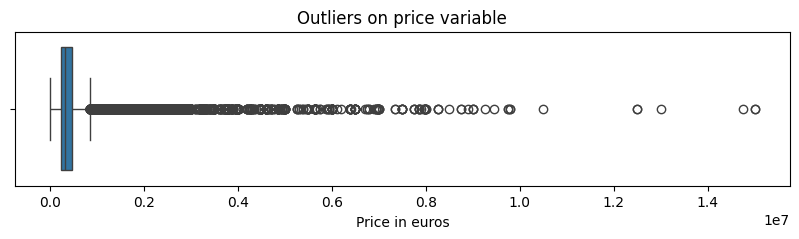

In [31]:
# On price variable 
plt.figure(figsize=(10,2))
sns.boxplot(x=df['price'])
plt.title("Outliers on price variable")
plt.xlabel("Price in euros")
plt.show()

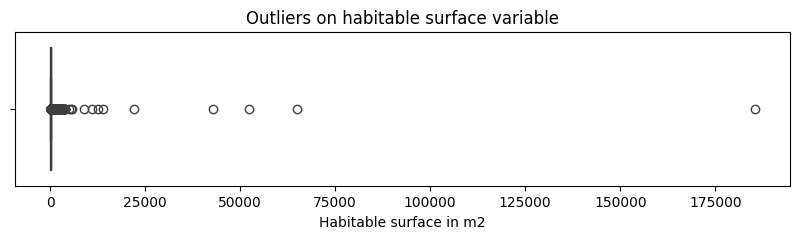

In [32]:
# On habitable surface variable 
plt.figure(figsize=(10,2))
sns.boxplot(x=df['habitableSurface'])
plt.title("Outliers on habitable surface variable")
plt.xlabel("Habitable surface in m2")
plt.show()

In [33]:
# Delete prices above 1000.0000
df = df[df['price'] < 1_000_000]

In [34]:
# Delete outliers on habitable surface = delete 0,5 % bigger habitable surface
df=df[df['habitableSurface']<df['habitableSurface'].quantile(0.995)]


#### Save the cleaned data to csv file 

In [35]:
df.to_csv("cleaned_data_kangaroo.csv", index=False)
print ("df saved as 'cleaned_data_kangaroo.csv'")

df saved as 'cleaned_data_kangaroo.csv'
